In [122]:
#upload the data
from google.colab import files
uploaded = files.upload()

Saving INF2178_A4_data.csv to INF2178_A4_data (5).csv


In [123]:
!pip install pingouin
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from statsmodels.formula.api import mixedlm
import scipy.stats as stats
import pingouin as pg

In [124]:
#check the data
df = pd.read_csv("INF2178_A4_data.csv")
df.head()

,Unnamed: 0,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444


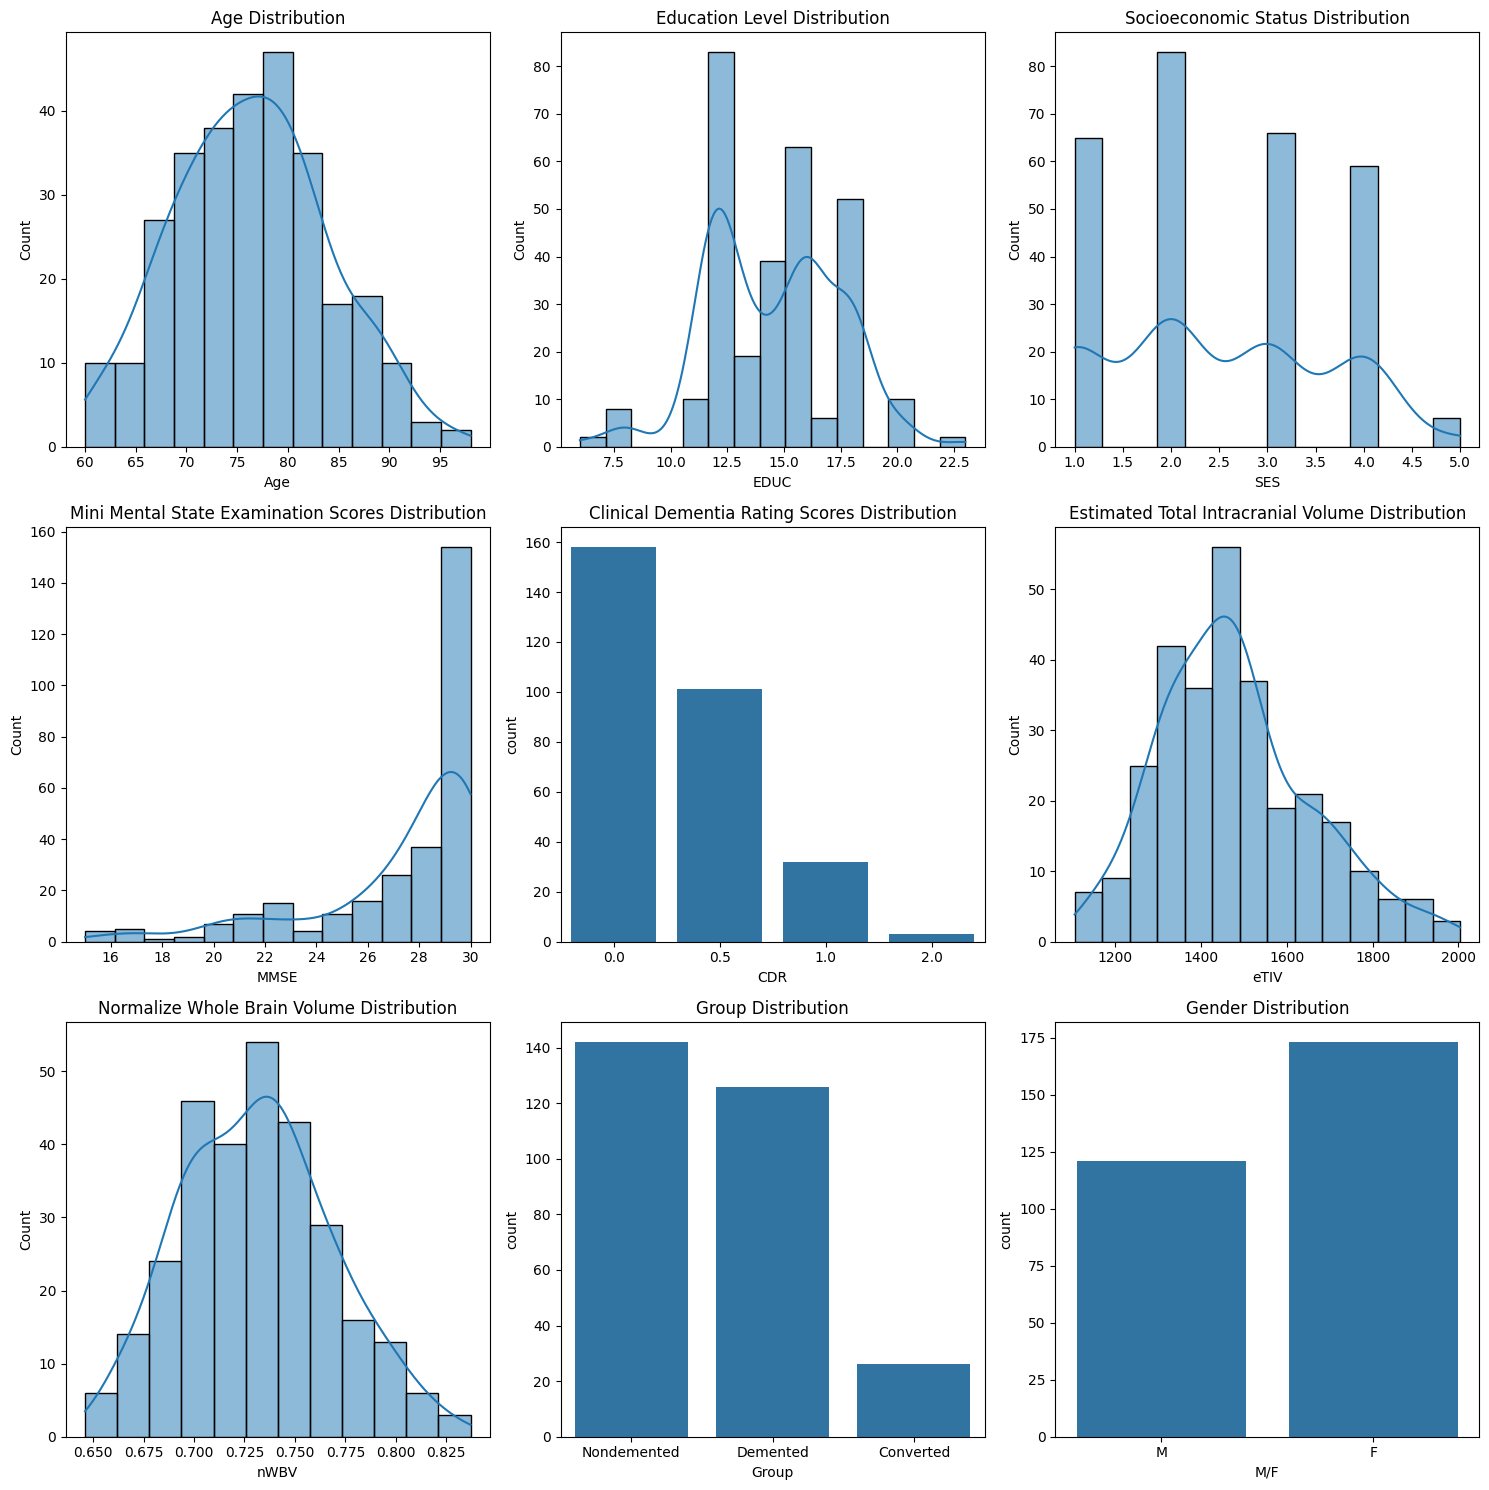

In [125]:
# EDA
title_mapping = {
    'Age': 'Age Distribution',
    'EDUC': 'Education Level Distribution',
    'SES': 'Socioeconomic Status Distribution',
    'MMSE': 'Mini Mental State Examination Scores Distribution',
    'CDR': 'Clinical Dementia Rating Scores Distribution',
    'eTIV': 'Estimated Total Intracranial Volume Distribution',
    'nWBV': 'Normalize Whole Brain Volume Distribution',
    'Group': 'Group Distribution',
    'M/F': 'Gender Distribution'
}

eda_columns = ['Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'Group', 'M/F']

fig = plt.figure(figsize=(15, 15))

# Loop through the selected columns for plotting
for i, column in enumerate(eda_columns):
    plt.subplot(3, 3, i+1)
    if df[column].dtype == 'O' or column == 'CDR':
        sns.countplot(x=df[column])
    else:
        sns.histplot(df[column], kde=True)
    plt.title(title_mapping.get(column, 'Distribution'))

plt.tight_layout()
plt.show()

In [126]:
#check the null
df.isna().sum()

Unnamed: 0     0
Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           15
MMSE           1
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [127]:
# Imputing missing values with the median of each column
df['SES'] = df['SES'].fillna(df['SES'].median())
df['MMSE'] = df['MMSE'].fillna(df['MMSE'].median())
df.isna().sum()

Unnamed: 0    0
Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

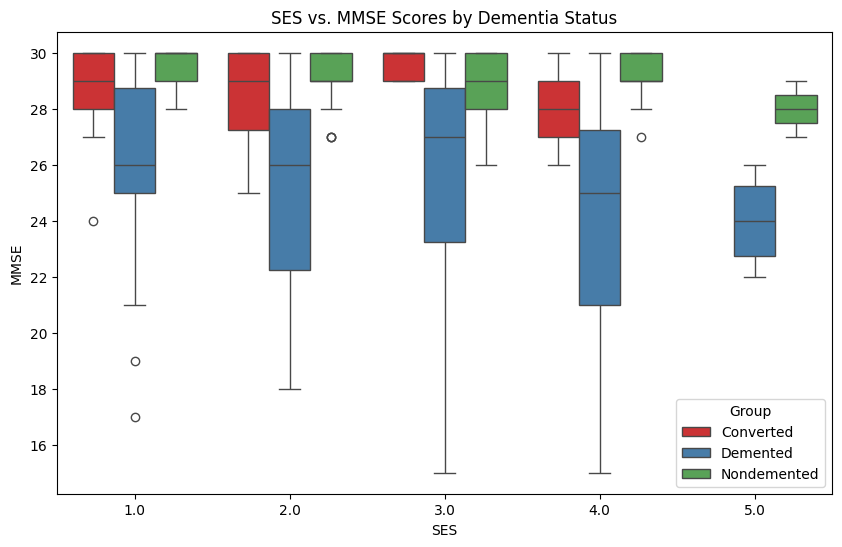

In [128]:
# Plot SES vs. MMSE for Demented and Nondemented groups
plt.figure(figsize=(10, 6))
sns.boxplot(x='SES', y='MMSE', hue='Group', data=df, palette="Set1")
plt.title('SES vs. MMSE Scores by Dementia Status')
plt.show()

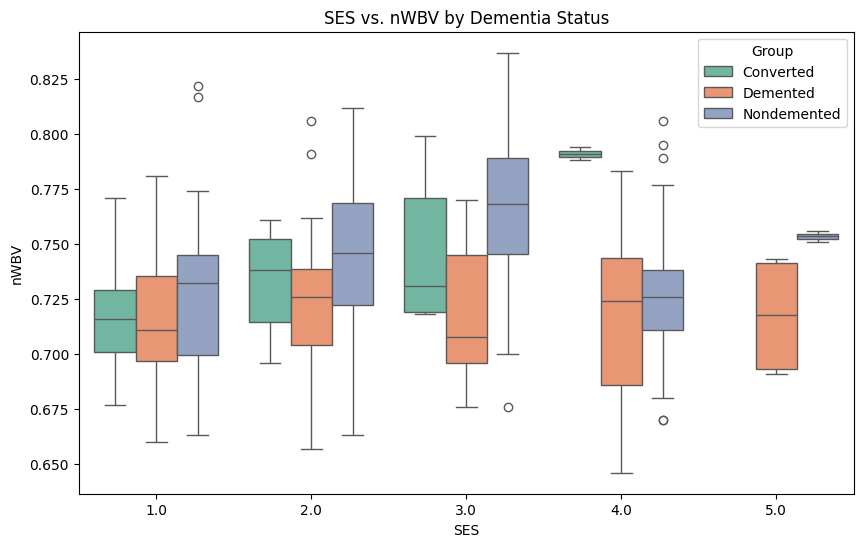

In [129]:
#Plot SES vs. nWBV for Demented and Nondemented groups
plt.figure(figsize=(10, 6))
sns.boxplot(x='SES', y='nWBV', hue='Group', data=df, palette="Set2")
plt.title('SES vs. nWBV by Dementia Status')
plt.show()

In [130]:
df['Subject ID'] = df['Subject ID'].astype('category')

In [131]:
# Conduct mixed ANOVA for cognitive function (MMSE)
aov_mmse = pg.mixed_anova(dv='MMSE', within='Visit', between='SES', subject='Subject ID', data=df)
print(aov_mmse)

        Source          SS  DF1  DF2         MS         F     p-unc       np2  \
0          SES  131.240601    4  139  32.810150  1.599323  0.177896  0.043999   
1        Visit   20.586806    1  139  20.586806  8.015490  0.005327  0.054521   
2  Interaction   19.908705    4  139   4.977176  1.937868  0.107512  0.052820   

   eps  
0  NaN  
1  1.0  
2  NaN  


In [132]:
# post-hoc
posthocs_group = pg.pairwise_tests(dv='MMSE', between='SES', subject='Subject ID', data=df, padjust='fdr_bh')
pg.print_table(posthocs_group)



POST HOC TESTS

Contrast        A      B  Paired    Parametric        T      dof  alternative      p-unc    p-corr  p-adjust      BF10    hedges
----------  -----  -----  --------  ------------  -----  -------  -------------  -------  --------  ----------  ------  --------
SES         1.000  2.000  False     True          0.998  144.442  two-sided        0.320     0.400  fdr_bh       0.273     0.156
SES         1.000  3.000  False     True          1.237  124.523  two-sided        0.218     0.312  fdr_bh       0.374     0.215
SES         1.000  4.000  False     True          2.713   98.835  two-sided        0.008     0.079  fdr_bh       5.078     0.494
SES         1.000  5.000  False     True          2.388    6.151  two-sided        0.053     0.177  fdr_bh       2.952     0.937
SES         2.000  3.000  False     True          0.414  127.127  two-sided        0.680     0.680  fdr_bh       0.186     0.067
SES         2.000  4.000  False     True          2.073   93.663  two-sided     

In [133]:
# Building the mixed-effects ANOVA model for nWBV
aov_nwbv = pg.mixed_anova(dv='nWBV', within='Visit', between='SES', subject='Subject ID', data=df)
print(aov_nwbv)


        Source        SS  DF1  DF2        MS          F         p-unc  \
0          SES  0.015940    4  139  0.003985   1.492978  2.075962e-01   
1        Visit  0.006508    1  139  0.006508  92.664084  4.036161e-17   
2  Interaction  0.000185    4  139  0.000046   0.660251  6.206442e-01   

        np2  eps  
0  0.041194  NaN  
1  0.399993  1.0  
2  0.018646  NaN  


In [134]:
# Post-Hoc
posthocs_nwbv = pg.pairwise_tests(dv='nWBV', between='SES', subject='Subject ID', data=df, padjust='fdr_bh')
pg.print_table(posthocs_nwbv)


POST HOC TESTS

Contrast        A      B  Paired    Parametric         T      dof  alternative      p-unc    p-corr  p-adjust      BF10    hedges
----------  -----  -----  --------  ------------  ------  -------  -------------  -------  --------  ----------  ------  --------
SES         1.000  2.000  False     True          -1.852  135.539  two-sided        0.066     0.221  fdr_bh       0.831    -0.296
SES         1.000  3.000  False     True          -2.763  126.718  two-sided        0.007     0.065  fdr_bh       5.679    -0.480
SES         1.000  4.000  False     True          -0.033  116.442  two-sided        0.974     0.974  fdr_bh       0.192    -0.006
SES         1.000  5.000  False     True          -0.447    6.414  two-sided        0.670     0.801  fdr_bh       0.413    -0.162
SES         2.000  3.000  False     True          -1.315  123.449  two-sided        0.191     0.382  fdr_bh       0.381    -0.215
SES         2.000  4.000  False     True           1.622  109.279  two-si

# POWER SECTION

In [135]:
import statsmodels.stats.power as smp
from statsmodels.stats.power import TTestIndPower
import numpy as np


In [136]:
# calculate the power directly
power_analysis = smp.TTestIndPower()

# Given parameters
effect_size = 0.7
alpha = 0.05
power = 0.91

sample_size_needed = power_analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha, ratio=1, alternative='two-sided')
print(f"Sample size needed (per group): {sample_size_needed:.2f}")

Sample size needed (per group): 45.45


In [137]:
# Generate a range of values for effect size and sample sizes for the plot
effect_sizes = np.array([0.3, 0.5, 0.7, 0.9])
sample_sizes = np.array(range(5, 100))

<Figure size 1000x600 with 0 Axes>

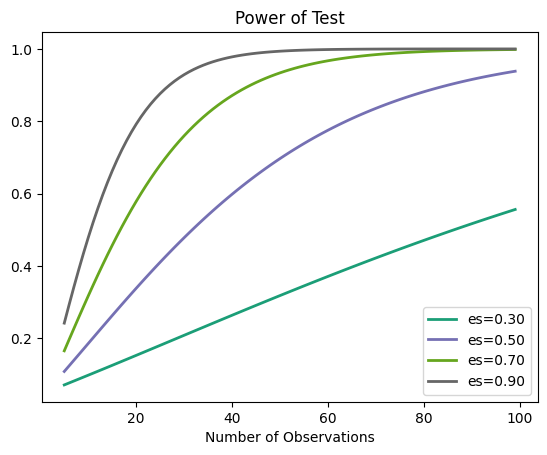

In [139]:
# Power analysis regarding parameters
plt.figure(figsize=(10, 6))
power_analysis.plot_power(dep_var='nobs', nobs=sample_sizes,
			effect_size=effect_sizes)
plt.show()